In [206]:
include("sim.jl")

simulate_pomdp (generic function with 1 method)

In [207]:
@time roadway, policy, scenes, headings = simulate_pomdp()

"collision" = "collision"
r = -15755.091434460155
 41.907611 seconds (170.31 M allocations: 14.631 GiB, 5.08% gc time)


(Roadway, DPWPlanner{laneChangeMDP,Frame{Entity{VehicleState,VehicleDef,Int64}},Int64,MCTS.SolvedRolloutEstimator{RandomPolicy{Random._GLOBAL_RNG,laneChangeMDP,BeliefUpdaters.NothingUpdater},Random._GLOBAL_RNG},RandomActionGenerator{Random._GLOBAL_RNG},Random._GLOBAL_RNG}(DPWSolver(20, 5.0, 500, Inf, 10.0, 0.5, 4.0, 0.125, false, true, true, true, false, Random._GLOBAL_RNG(), RolloutEstimator(RandomSolver(Random._GLOBAL_RNG())), 0.0, 0, RandomActionGenerator{Random._GLOBAL_RNG}(Random._GLOBAL_RNG()), ExceptionRethrow()), laneChangeMDP
  env: laneChangeEnvironment
  discount_factor: Float64 0.95
  terminal_state: Bool true
  collision: Bool false
  starting_velocity: Float64 20.0
  timestep: Float64 0.05
  model: lat_lon_driver
  driver_models: Dict{Int64,DriverModel}
  recommended_low_speed: Float64 18.0
  recommended_high_speed: Float64 25.0
, MCTS.DPWTree{Frame{Entity{VehicleState,VehicleDef,Int64}},Int64}([500, 0, 0, 0, 0, 67, 0, 0, 47, 45  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Array{In

(get_lane(roadway, (scenes[end])[1])).tag.lane = 3
length(scenes) = 136


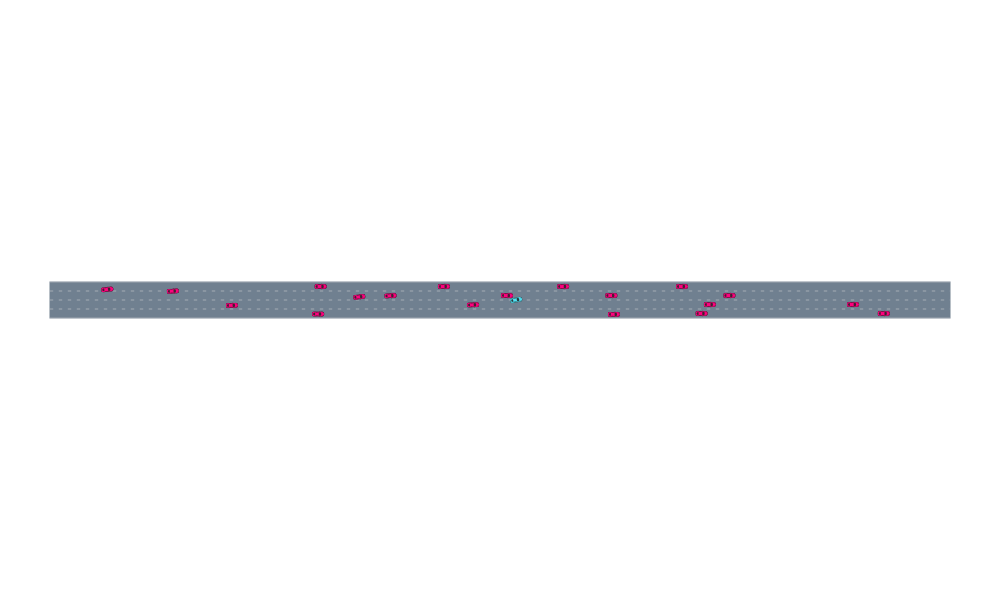

In [208]:
@show get_lane(roadway, scenes[end][1]).tag.lane
@show length(scenes)
car_colors = Dict{Int,Colorant}(1 => colorant"0x52E3F6")
render(scenes[end], roadway, cam = FitToContentCamera(), car_colors=car_colors) # CarFollowCamera(1)

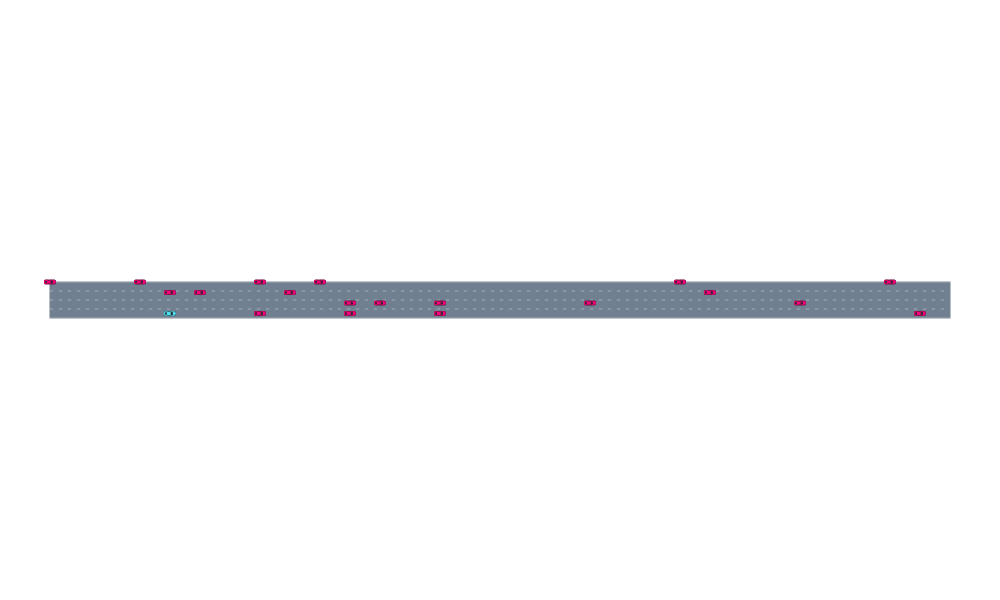

In [209]:
# car_colors = Dict{Int,Colorant}(1 => colorant"0x52E3F6")
render(scenes[1], roadway, cam = FitToContentCamera(), car_colors=car_colors) # CarFollowCamera(1)

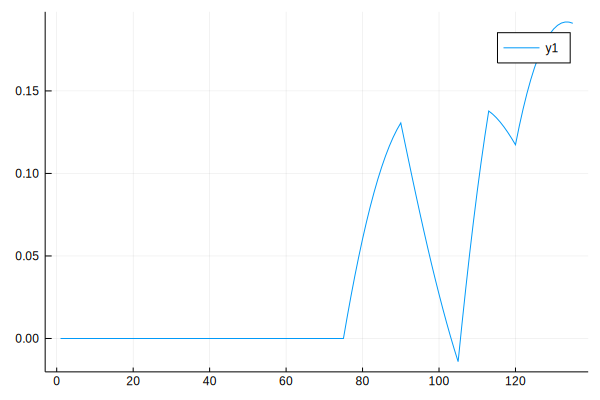

In [210]:
plot(headings)

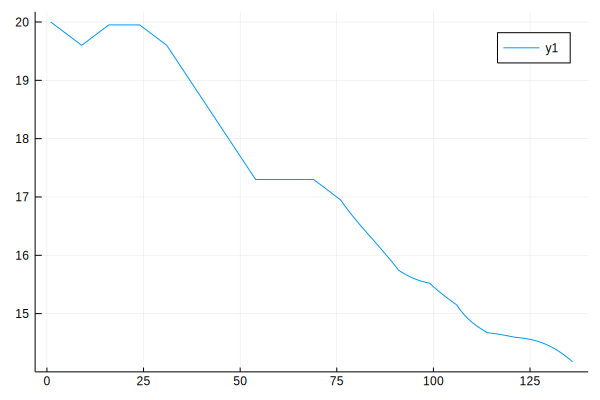

In [211]:
vels = []
for i=1:length(scenes)
    push!(vels, scenes[i][1].state.v)
end
plot(vels)

In [101]:
num_goal = 0
num_fail = 0
num_collisions = 0
num_timeouts = 0
nlanes = 4
ntrials = 100
vehicle_width = scenes[end][1].def.width
lane_break_distance = DEFAULT_LANE_WIDTH / 2 - vehicle_width / 2
for i = 1:ntrials
    @time roadway, policy, scenes = simulate_pomdp()
    if get_lane(roadway, scenes[end][1].state).tag.lane == nlanes && abs(scenes[end][1].state.posF.ϕ) < pi/6 && abs(scenes[end][1].state.posF.t) < lane_break_distance
        num_goal += 1
    else
        num_fail += 1
        if collision_checker(scenes[end], EGO_ID) 
            num_collisions += 1
        else
            num_timeouts += 1
        end
    end
end

"finish line" = "finish line"
r = 10694.776696129053
 10.483654 seconds (86.78 M allocations: 7.282 GiB, 7.98% gc time)
"finish line" = "finish line"
r = 11920.73456197077
 16.657638 seconds (146.53 M allocations: 12.261 GiB, 8.54% gc time)
"timeout" = "timeout"
r = -72813.50000000003
 86.122304 seconds (803.86 M allocations: 65.651 GiB, 8.00% gc time)
"finish line" = "finish line"
r = 10471.024717441149
 17.357303 seconds (156.08 M allocations: 13.207 GiB, 6.90% gc time)
"finish line" = "finish line"
r = 10925.510173580471
 10.125778 seconds (86.20 M allocations: 7.252 GiB, 10.75% gc time)
"timeout" = "timeout"
r = -45415.42154655492
 79.240517 seconds (702.91 M allocations: 59.665 GiB, 8.12% gc time)
"collision" = "collision"
r = -15962.194538178686
 17.054473 seconds (157.15 M allocations: 13.085 GiB, 7.01% gc time)
"collision" = "collision"
r = -20751.670013408846
 22.106082 seconds (194.95 M allocations: 16.394 GiB, 8.65% gc time)
"collision" = "collision"
r = -12537.56745238669
 

InterruptException: InterruptException:

In [92]:
@show num_goal
@show num_fail
@show num_collisions
@show num_timeouts

num_goal = 34
num_fail = 41
num_collisions = 25
num_timeouts = 16


16

In [ ]:
# d 20, c 5, i 500: 2-8
# d 50, c 5, i 500: 0-10
# d 20, c 10, i 500: 3-7
# d 20, c 15, i 500: 3-7
# d 20, c 10, i 750: 0-10

In [25]:
using D3Trees
mdp = laneChangeMDP()
state = initialstate(mdp, MersenneTwister(0))
solver = MCTSSolver(n_iterations=500, depth=20, exploration_constant=10.0)
planner = solve(solver, mdp)
D3Tree(policy, planner, init_expand=2)

MethodError: MethodError: no method matching D3Tree(::DPWPlanner{laneChangeMDP,Frame{Entity{VehicleState,VehicleDef,Int64}},Int64,MCTS.SolvedRolloutEstimator{RandomPolicy{MersenneTwister,laneChangeMDP,BeliefUpdaters.NothingUpdater},MersenneTwister},RandomActionGenerator{MersenneTwister},MersenneTwister}, ::MCTSPlanner{laneChangeMDP,Frame{Entity{VehicleState,VehicleDef,Int64}},Int64,MCTS.SolvedRolloutEstimator{RandomPolicy{MersenneTwister,laneChangeMDP,BeliefUpdaters.NothingUpdater},MersenneTwister},MersenneTwister}; init_expand=2)
Closest candidates are:
  D3Tree(::Any, ::Any, !Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any) at /Users/williambrannon/.julia/packages/D3Trees/CDEyE/src/D3Trees.jl:20 got unsupported keyword argument "init_expand"
  D3Tree(!Matched::MCTSPlanner, ::Any; kwargs...) at /Users/williambrannon/.julia/packages/MCTS/iKnNr/src/visualization.jl:16
  D3Tree(::DPWPlanner; kwargs...) at /Users/williambrannon/.julia/packages/MCTS/iKnNr/src/visualization.jl:38
  ...

In [70]:
@show length(scenes)

length(scenes) = 199


199

In [82]:
@show scenes[1][2].state.v

((scenes[1])[2]).state.v = 6.9397749279404e-310


6.9397749279404e-310

In [59]:
using Reel

 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
  [71555da5] + Reel v1.1.1
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


In [60]:
function animate_record(scenes::Vector{Scene},dt::Float64, roadway::Roadway{Float64}, car_colors=Dict{Int,Colorant}(1 => colorant"0x52E3F6"), cam=FitToContentCamera())
    duration =size(scenes)[1]*dt::Float64
    fps = Int(1/dt)
    function render_rec(t, dt)
        frame_index = Int(floor(t/dt)) + 1
        return render(scenes[frame_index], roadway, cam=cam, car_colors=car_colors)
    end
    return duration, fps, render_rec
end

animate_record (generic function with 3 methods)

In [205]:
duration, fps, render_hist = animate_record(scenes, 0.05, roadway)
film = roll(render_hist, fps = fps, duration = duration)
write("simulation.mp4", film)

"simulation.mp4"